# Import Libraries

In [14]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Thu Mar  5 23:06:26 2020


In [15]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Mar  5 23:06:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 440.59       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   63C    P2    40W /  N/A |   1278MiB /  8117MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [16]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# if ram_gb < 20:
#   print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
#   print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
#   print('re-execute this cell.')
# else:
#   print('You are using a high-RAM runtime!')

In [17]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import matplotlib.pyplot as plt
import numpy as np
import src.utils.utils as utils
import src.models.train_model as train
%matplotlib inline

%config IPCompleter.greedy=True

In [18]:
import torch
print(torch.__version__)

1.4.0


In [19]:
preproc = preprocessing.Preprocessing()

train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()



In [20]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)


Files already downloaded and verified
Files already downloaded and verified


In [21]:
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset)

train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
256


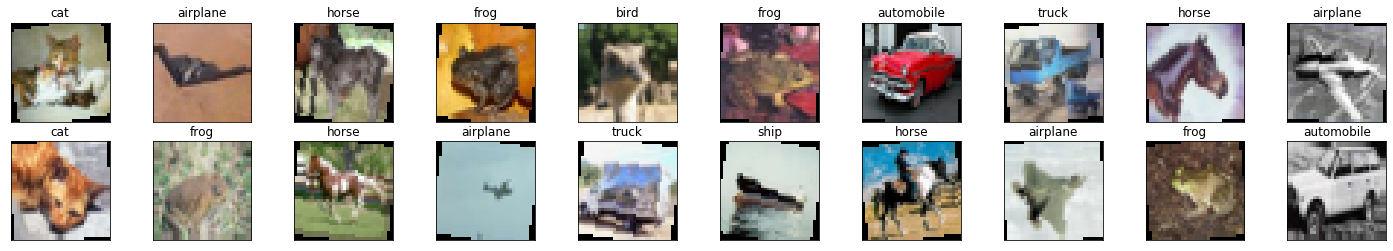

In [22]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# obtain one batch of training images
dataiterator = iter(train_loader)
images, labels = dataiterator.next()
images = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks=[], yticks=[])
    utils.Utils.imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [23]:
cnn_model, device = utils.Utils.createmodel()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda


RuntimeError: size mismatch, m1: [1 x 128], m2: [64 x 10] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:290

In [ ]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.1, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=5,
                                        verbose=True)

In [12]:
lr_data = []
epochs = 25
for epoch in range(0, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.5465418100357056 Batch_id=195 Accuracy=45.49: 100%|██████████| 196/196 [01:25<00:00,  2.29it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 4195/10000 (41.95%)

Learning rate = 0.01  for epoch:  1
EPOCH: 1


Loss=1.4220759868621826 Batch_id=47 Accuracy=58.59:  24%|██▍       | 48/196 [00:21<01:07,  2.18it/s]

KeyboardInterrupt: 